# Exploratory/Inferential Analysis on the Heart Disease Dataset

In [ ]:
pip install ucimlrepo

Carichiamo i dati dal repository di UCI ML

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

data = X.join(y)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
#import pandas as pd
#pd.read_csv('heart.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
for column in data.columns:
  x = data[column].isna().sum()
  print("Number of NaN in column", column, "is", x)

Number of NaN in column age is 0
Number of NaN in column sex is 0
Number of NaN in column cp is 0
Number of NaN in column trestbps is 0
Number of NaN in column chol is 0
Number of NaN in column fbs is 0
Number of NaN in column restecg is 0
Number of NaN in column thalach is 0
Number of NaN in column exang is 0
Number of NaN in column oldpeak is 0
Number of NaN in column slope is 0
Number of NaN in column ca is 4
Number of NaN in column thal is 2
Number of NaN in column num is 0


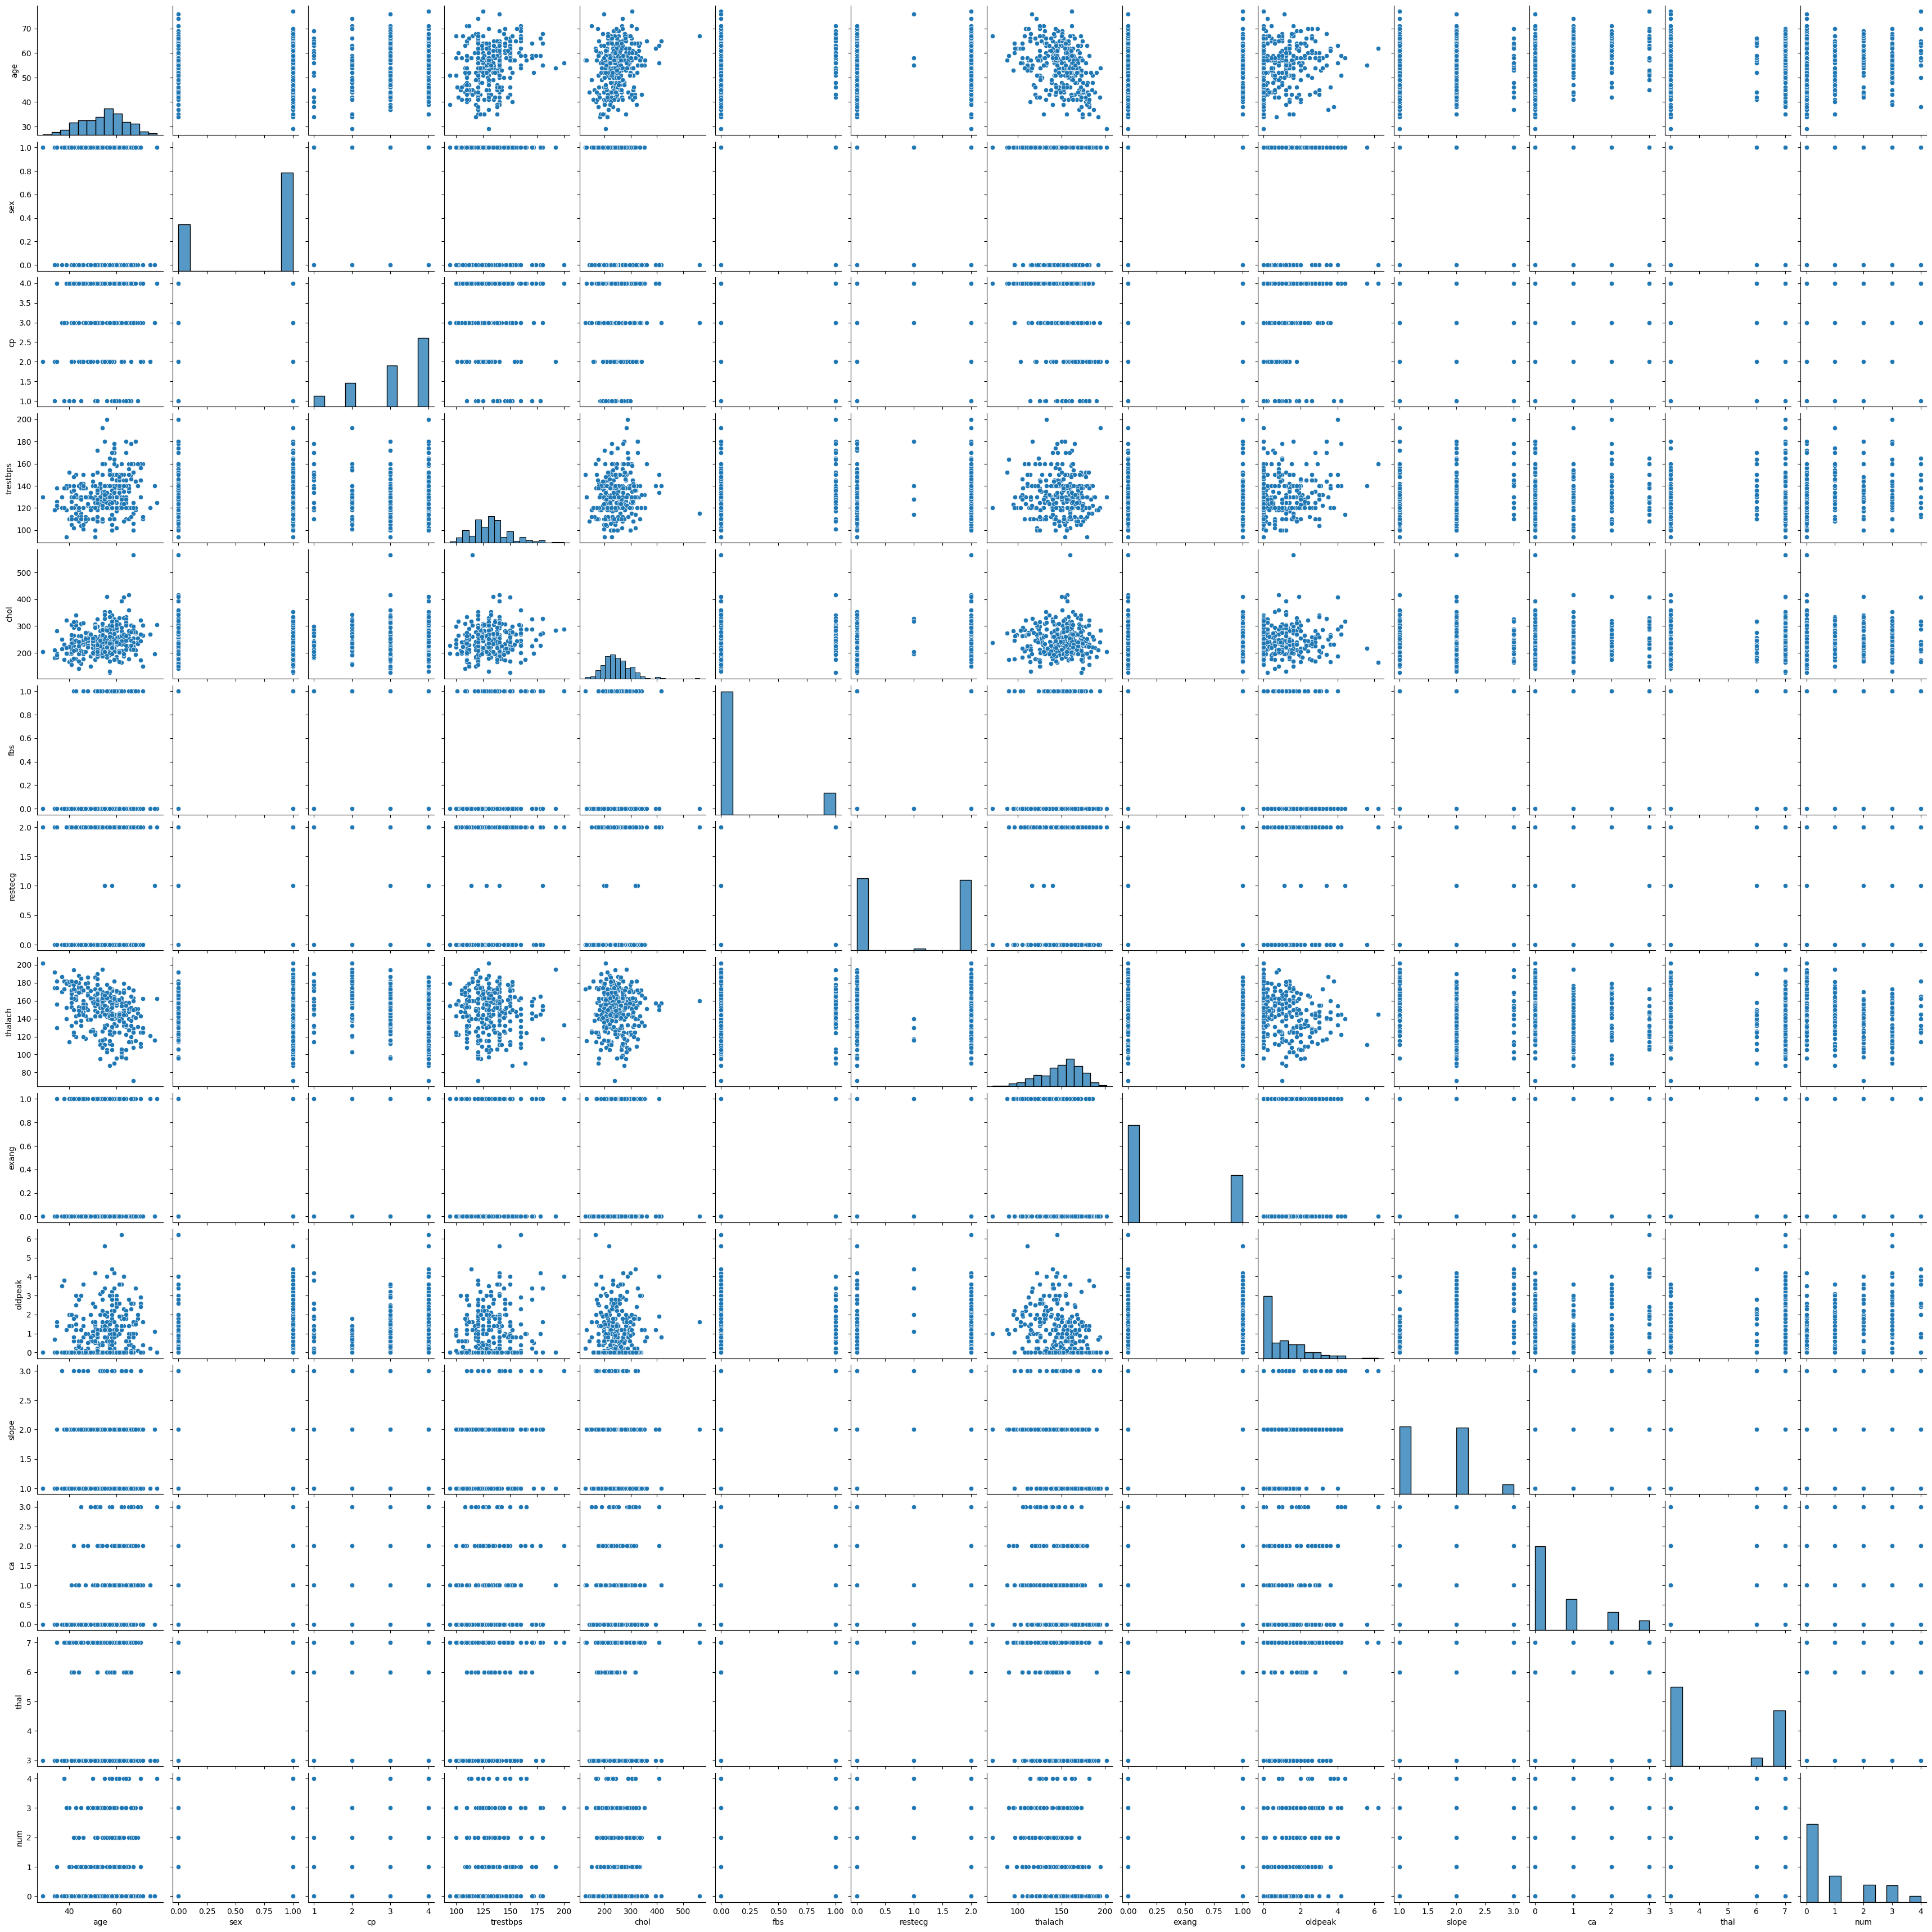

In [ ]:
import seaborn as sns

sns.pairplot(data)

In [ ]:
data['num'].unique()

array([0, 2, 1, 3, 4])

## Does age affect maximum heart rate?

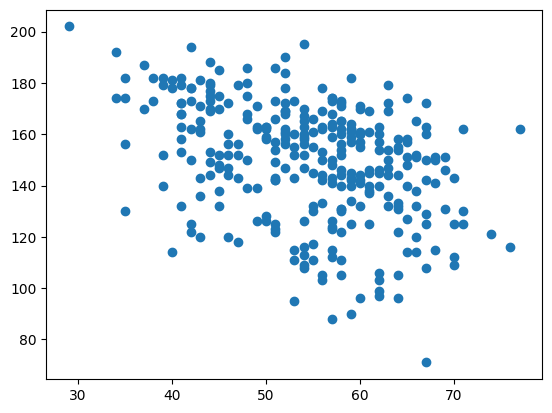

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(data['age'], data['thalach'])
plt.show()

In [ ]:
from scipy.stats import pearsonr

pearsonr(data['age'], data['thalach'])

PearsonRResult(statistic=-0.3938058059868209, pvalue=1.1092756352878365e-12)

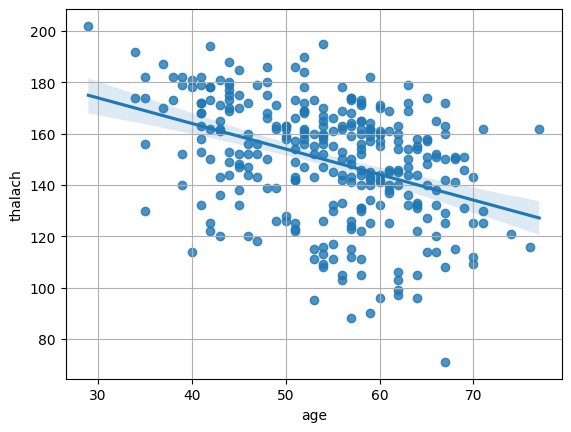

In [ ]:
sns.regplot(data, x='age', y='thalach')
plt.grid()

In [ ]:
from statsmodels.formula.api import ols

ols("thalach ~ age", data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                thalach   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     55.25
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.11e-12
Time:                        16:54:49   Log-Likelihood:                -1352.3
No. Observations:                 303   AIC:                             2709.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.8634      7.399     27.553      0.000     189.303     218.424
age           -0.9966      0.134     -7.433      0.000      -1.261      -0.733
==============================================================================
Omnibus:                       19.198   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.705
Skew:                          -0.654   Prob(JB):                     1.94e-05
Kurtosis:                       2.922   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

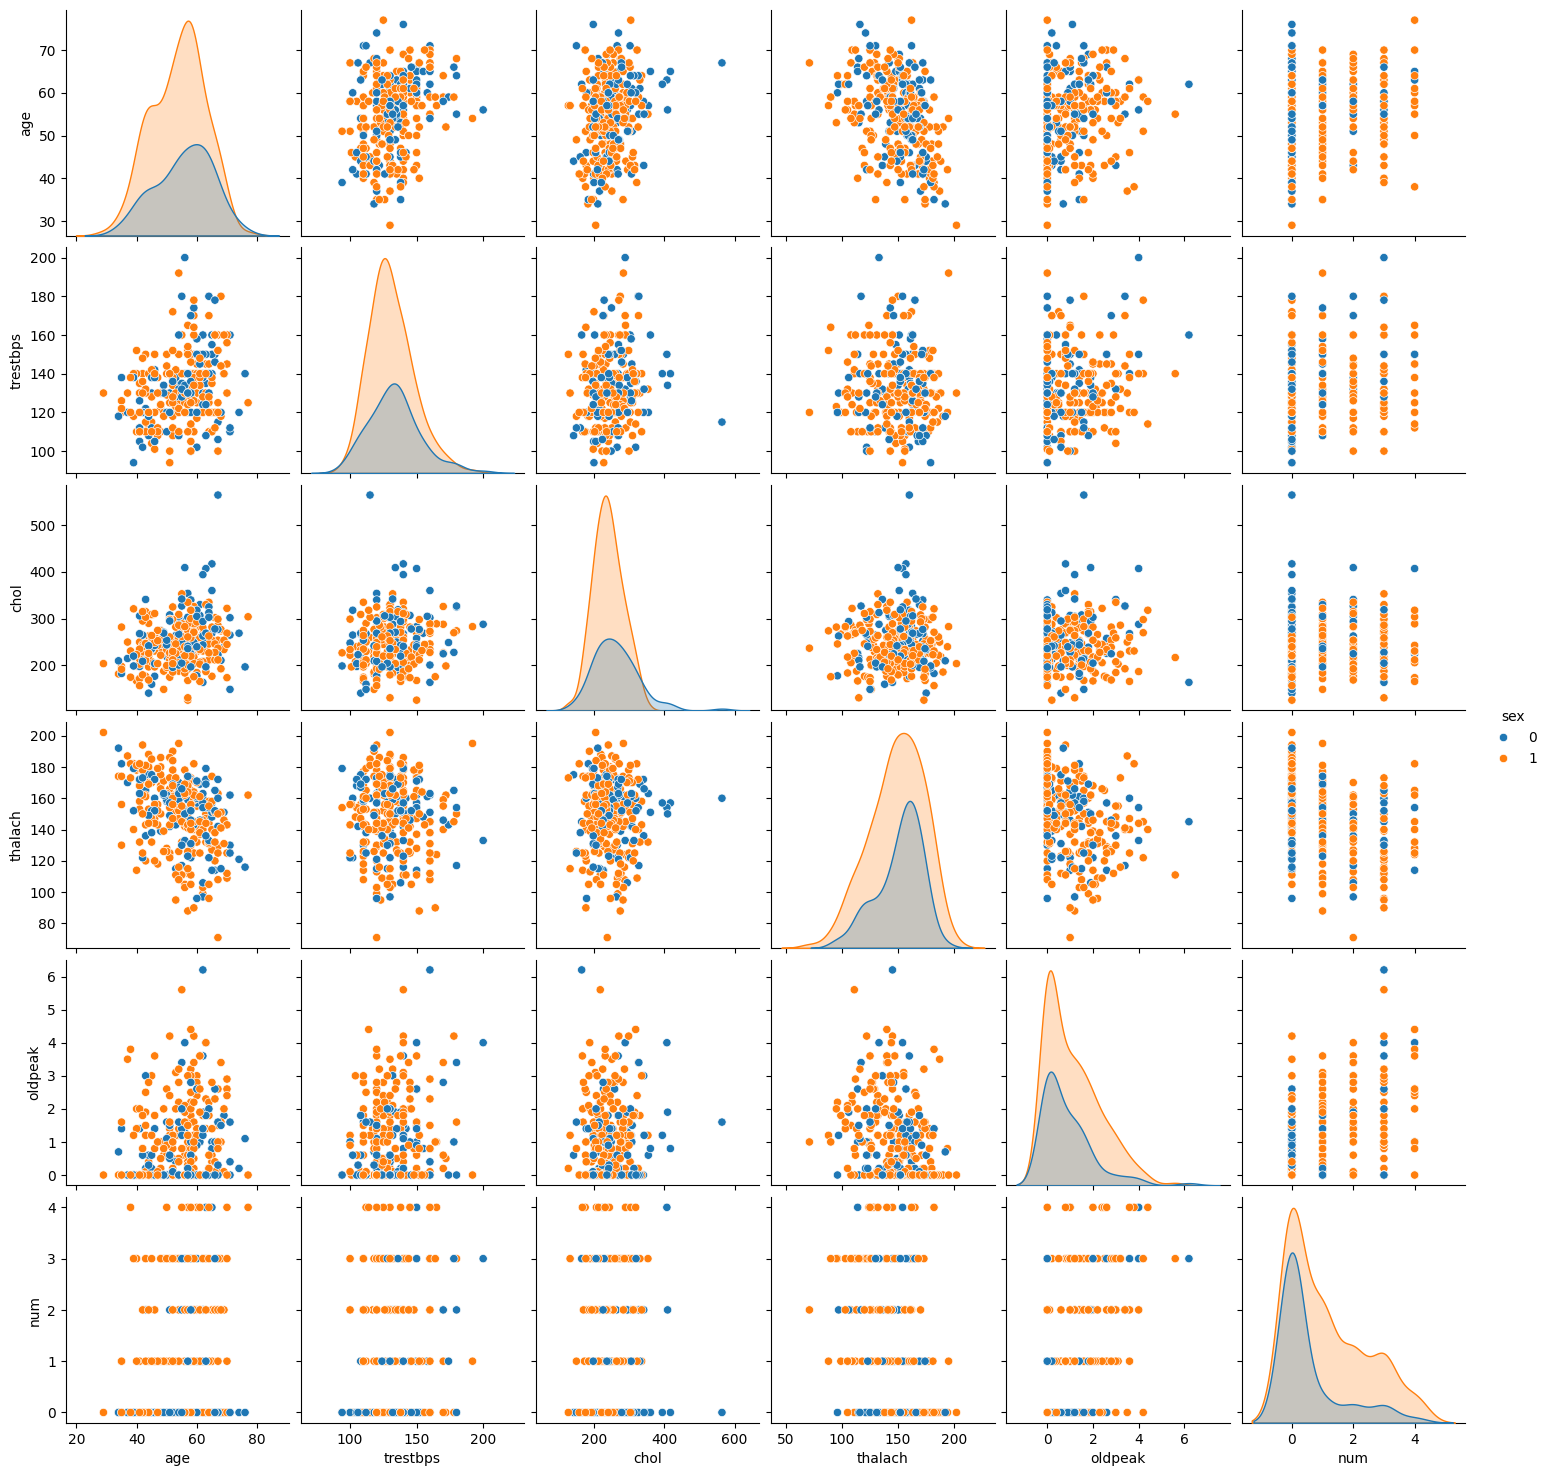

In [ ]:
import seaborn as sns

sns.pairplot(data.drop(['cp','fbs','restecg','exang','slope','ca','thal'], axis=1), hue='sex')

<Axes: xlabel='sex'>

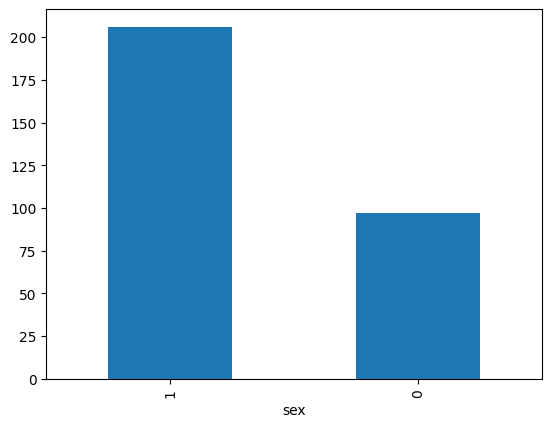

In [ ]:
data['sex'].value_counts().plot.bar()

<Axes: xlabel='sex'>

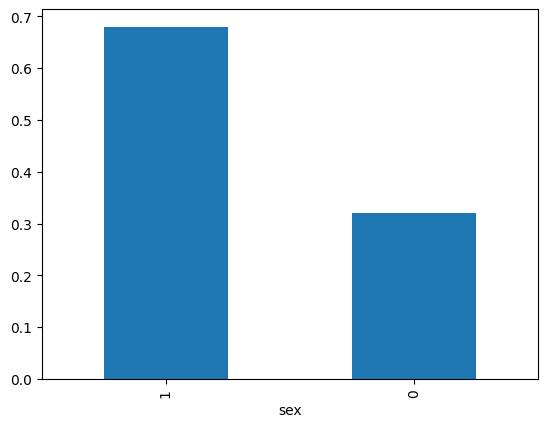

In [ ]:
data['sex'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='sex'>

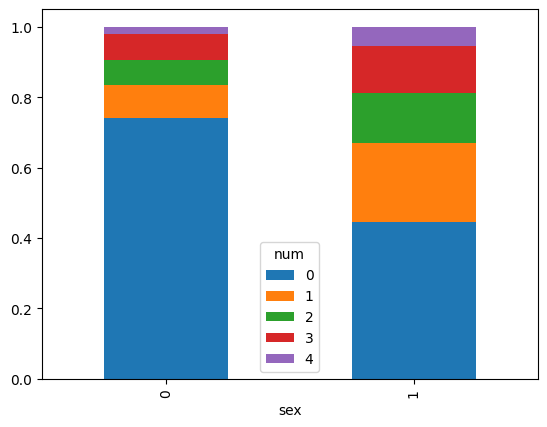

In [ ]:
pd.crosstab(data['sex'], data['num'],normalize='index').plot.bar(stacked=True)

<Axes: xlabel='sex'>

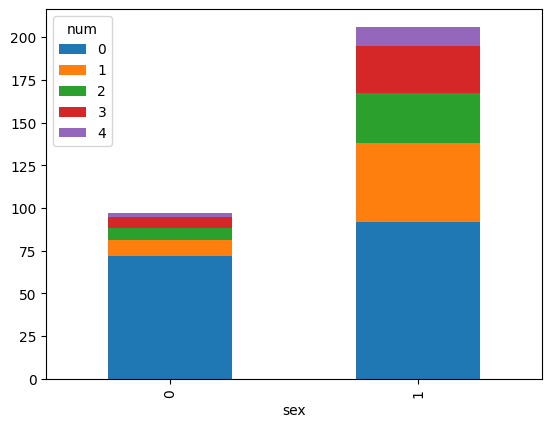

In [ ]:
pd.crosstab(data['sex'], data['num']).plot.bar(stacked=True)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# Perform the Chi-Square Test for Independence
contingency_table = pd.crosstab(data['sex'], data['num'])
chi2, p, _, exp_freq = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

print("Cramer's V:", association(contingency_table))

# Interpret the results
if p < alpha:
    print("\nThere is a significant association between 'Sex' and 'survived'.")
else:
    print("\nThere is no significant association between 'Sex' and 'survived'.")

Chi-Square Statistic: 23.425407307562654
p-value: 0.00010410590365461076
Cramer's V: 0.27804959139060786

There is a significant association between 'Sex' and 'survived'.


In [ ]:
data_binary = data.copy()
data_binary['num'] = data_binary['num'].apply(lambda x: 1 if x >= 1 else 0)
crosstab_binary = pd.crosstab(data_binary['sex'], data_binary['num'])
crosstab_binary

num,0,1
sex,,
0,72,25
1,92,114


In [ ]:
from scipy.stats.contingency import relative_risk
relative_risk(crosstab_binary[1][1], crosstab_binary[1].sum(), crosstab_binary[0][1], crosstab_binary[0].sum())
#relative_risk(contingency['Exposed']['Diseased'],contingency['Exposed'].sum(),contingency['Non Exposed']['Diseased'], contingency['Non Exposed'].sum())

RelativeRiskResult(relative_risk=1.4619956208945886, exposed_cases=114, exposed_total=139, control_cases=92, control_total=164)

In [ ]:
# prompt: can you invert the rows of crosstab_binary

crosstab_binary_inverted = crosstab_binary.iloc[::-1]
crosstab_binary_inverted = crosstab_binary_inverted[[1,0]]
crosstab_binary_inverted

num,1,0
sex,,
1,114,92
0,25,72


In [ ]:
from scipy.stats.contingency import odds_ratio


odds_ratio(crosstab_binary_inverted)

OddsRatioResult(statistic=3.55354424429681)

## Logistic regression analysis on binarized data

In [ ]:
from statsmodels.formula.api import logit
logit("num ~ sex", data_binary).fit().summary()

Optimization terminated successfully.
         Current function value: 0.650054
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    num   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.05754
Time:                        17:36:26   Log-Likelihood:                -196.97
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 9.390e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0578      0.232     -4.557      0.000      -1.513      -0.603
sex            1.2722      0.271      4.692      0.000       0.741       1.804
==============================================================================
"""

In [ ]:
import numpy as np
odds = np.exp(-1.0578)
p = odds/(1+odds)
p

0.2577301019775979

In [ ]:
np.exp(1.2722)

3.568695061578707

In [ ]:
odds_m = odds*np.exp(1.2722)
odds_m/(1+odds_m)

0.5533956185614641

## Multinomial Logistic Regression Analysis

In [ ]:
from statsmodels.formula.api import mnlogit
mnlogit("num ~ sex", data).fit().summary()

Optimization terminated successfully.
         Current function value: 1.239318
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                    num   No. Observations:                  303
Model:                        MNLogit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                 0.03141
Time:                        17:46:39   Log-Likelihood:                -375.51
converged:                       True   LL-Null:                       -387.69
Covariance Type:            nonrobust   LLR p-value:                 6.775e-05
==============================================================================
     num=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0794      0.354     -5.882      0.000      -2.772      -1.386
sex            1.3863      0.397      3.492      0.000       0.608       2.164
------------------------------------------------------------------------------
     num=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3308      0.396     -5.887      0.000      -3.107      -1.555
sex            1.1763      0.450      2.617      0.009       0.295       2.057
------------------------------------------------------------------------------
     num=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3308      0.396     -5.887      0.000      -3.107      -1.555
sex            1.1412      0.451      2.531      0.011       0.257       2.025
------------------------------------------------------------------------------
     num=4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5835      0.717     -4.999      0.000      -4.989      -2.178
sex            1.4596      0.785      1.860      0.063      -0.078       2.998
==============================================================================
"""

In [ ]:
odds1=np.exp(-2.0794)

odds2=np.exp(-2.0794)*np.exp(1.3863)

p1 = odds1/(1+odds1)
p2 = odds2/(1+odds2)

print(p1, p2)

0.11111521405935315 0.3333438179846534
